In [1]:
import os
from collections import defaultdict

import numpy as np
import scipy as sp
from scipy import misc, stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from fitter import Fitter

%matplotlib inline

In [2]:
DIRNAME = '../data/images/'
COLOR = {'red': 0,
         'green': 1,
         'blue': 2}  # RGB

In [3]:
with open('../data/Dataset_tune.txt') as f:
    image_names = ['im'+ x.strip()+'.jpg' for x in f.readlines()]

## 2. Для каждого канала цвета каждого изображения из тестового пакета вычислить следующие характеристики:

In [4]:
image_names[:5]

['im16018.jpg', 'im2832.jpg', 'im10328.jpg', 'im16071.jpg', 'im22284.jpg']

In [5]:
len(image_names)

5000

In [33]:
data = {}
for name, num in COLOR.items():
    data[name] = pd.DataFrame()
    for image_name in image_names[:1000]:
        image = np.array(Image.open(DIRNAME+image_name))
        a = image[:, :, num].ravel()
        d = {'name': image_name,
             'min': np.min(a),
             'max': np.max(a),
             'mean': np.mean(a),
             'var': np.var(a),
             'median': np.median(a),
             'interquartile': sp.stats.iqr(a),
             'skewness': sp.stats.skew(a),
             'kurtosis': sp.stats.kurtosis(a)}
        data[name] = pd.concat([data[name], pd.DataFrame(pd.DataFrame(d, index=[0,]))], ignore_index=True)

In [37]:
data['blue'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,45.0,0.421079,255,45.580790,41.0,0,im16018.jpg,0.615814,1024.438924
1,157.0,-1.278983,255,154.111294,157.0,0,im2832.jpg,-0.251882,6726.445485
2,174.0,-1.434889,255,106.175979,60.0,0,im10328.jpg,0.583531,7265.348274
3,64.0,-1.155102,178,68.568731,75.0,0,im16071.jpg,-0.415416,1354.069329
4,145.0,-1.432003,255,105.647718,110.0,0,im22284.jpg,0.021974,5578.253765


In [38]:
data['red'].head()

,interquartile,kurtosis,max,mean,median,min,name,skewness,var
0,41.0,0.399050,255,41.468431,36.0,0,im16018.jpg,0.789478,897.363995
1,146.0,-1.224572,255,153.781394,156.0,0,im2832.jpg,-0.219189,6214.021990
2,104.0,-0.735921,234,121.656235,149.0,0,im10328.jpg,-0.930703,4209.820332
3,113.0,-0.882227,255,155.734336,172.0,0,im16071.jpg,-0.484947,5471.229412
4,146.0,-1.263383,255,132.356751,156.0,0,im22284.jpg,-0.408834,6317.783450


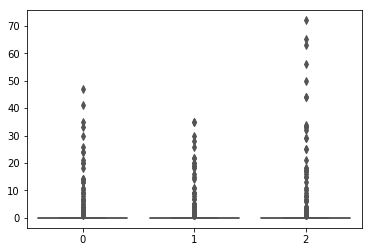

In [90]:
sns.boxplot(data=[data['blue']['min'], data['green']['min'], data['red']['min'],], palette="muted")

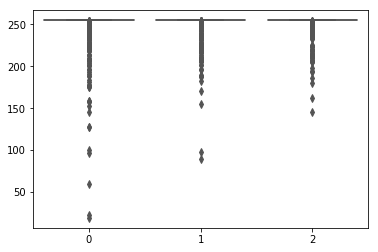

In [91]:
sns.boxplot(data=[data['blue']['max'], data['green']['max'], data['red']['max'],], palette="muted")

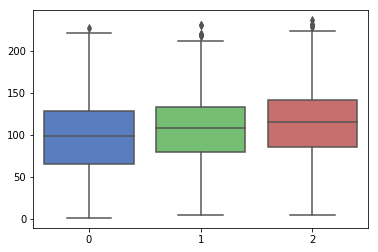

In [92]:
sns.boxplot(data=[data['blue']['mean'], data['green']['mean'], data['red']['mean'],], palette="muted")

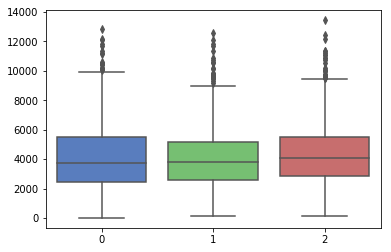

In [93]:
sns.boxplot(data=[data['blue']['var'], data['green']['var'], data['red']['var'],], palette="muted")

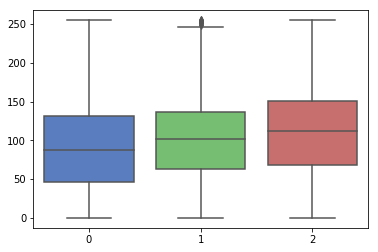

In [97]:
sns.boxplot(data=[data['blue']['median'], data['green']['median'], data['red']['median'],], palette="muted")

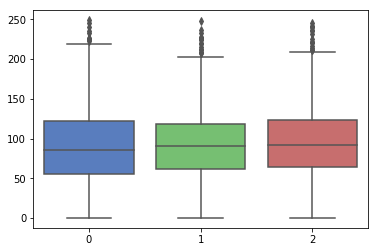

In [98]:
sns.boxplot(data=[data['blue']['interquartile'], data['green']['interquartile'], data['red']['interquartile'],], palette="muted")

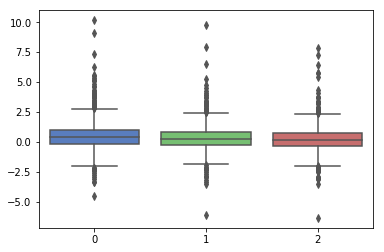

In [95]:
sns.boxplot(data=[data['blue']['skewness'], data['green']['skewness'], data['red']['skewness'],], palette="muted")

## аппроксимация

In [6]:
DISTRIBUTIONS = ['beta', 'gamma', 'uniform', 'norm']
BINS = 256

In [7]:
hist = {'red': defaultdict(int),
        'green': defaultdict(int),
        'blue': defaultdict(int),}

In [8]:
for name, num in COLOR.items():
    for image_name in image_names[:10]:
        image = np.array(Image.open(os.path.join(DIRNAME, image_name)))
        a = image[:, :, num].ravel()
        f = Fitter(a, distributions=DISTRIBUTIONS, bins=BINS)
        f.fit()
        hist[name][f.df_errors['sumsquare_error'].idxmin()] += 1

/home/sasha253c/myprog/kpi/progonov/progonov_labs/.venv/lib/python3.5/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning:

invalid value encountered in sqrt



Fitted beta distribution with error=0.005979481271560883)
Fitted gamma distribution with error=0.006576334786495469)
Fitted uniform distribution with error=0.011522789972002987)
Fitted norm distribution with error=0.006584604862043096)
Fitted beta distribution with error=0.005038263455479657)
Fitted gamma distribution with error=0.009488507673580638)
Fitted uniform distribution with error=0.008680849370145405)
Fitted norm distribution with error=0.009478136402493892)
Fitted beta distribution with error=0.01263265953923496)
Fitted gamma distribution with error=0.003721116306516982)
Fitted uniform distribution with error=0.004369213065059148)
Fitted norm distribution with error=0.005378343122502285)
Fitted beta distribution with error=0.011530067467334574)
Fitted gamma distribution with error=0.01041257403833714)
Fitted uniform distribution with error=0.011942990637523344)
Fitted norm distribution with error=0.01029299432980623)
Fitted beta distribution with error=0.001662094520572728)
F

In [9]:
hist

{'blue': defaultdict(int, {'beta': 5, 'gamma': 3, 'norm': 1, 'uniform': 1}),
 'green': defaultdict(int, {'beta': 5, 'gamma': 3, 'norm': 1, 'uniform': 1}),
 'red': defaultdict(int, {'beta': 5, 'gamma': 1, 'norm': 2, 'uniform': 2})}

,sumsquare_error
gamma,0.002142
norm,0.002170
beta,0.002278
uniform,0.003336


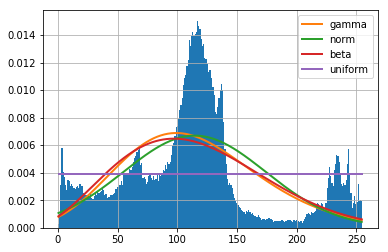

In [10]:
f.summary()

In [69]:
f.df_errors['sumsquare_error']

beta       0.004207
gamma      0.003520
norm       0.003505
uniform    0.004284
Name: sumsquare_error, dtype: float64

In [63]:
f.df_errors['sumsquare_error']

beta       0.004207
gamma      0.003520
laplace    0.002577
norm       0.003505
pareto     0.005550
uniform    0.004284
Name: sumsquare_error, dtype: float64